In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

import warnings
warnings.simplefilter("ignore")

# Comparing Two Samples

In [29]:
births = Table.read_table('baby.csv')
smoking_and_birthweight = births.select('Maternal Smoker', 'Birth Weight')
smoking_and_birthweight.show(6)

Maternal Smoker,Birth Weight
False,120
False,113
True,128
True,108
False,136
False,138


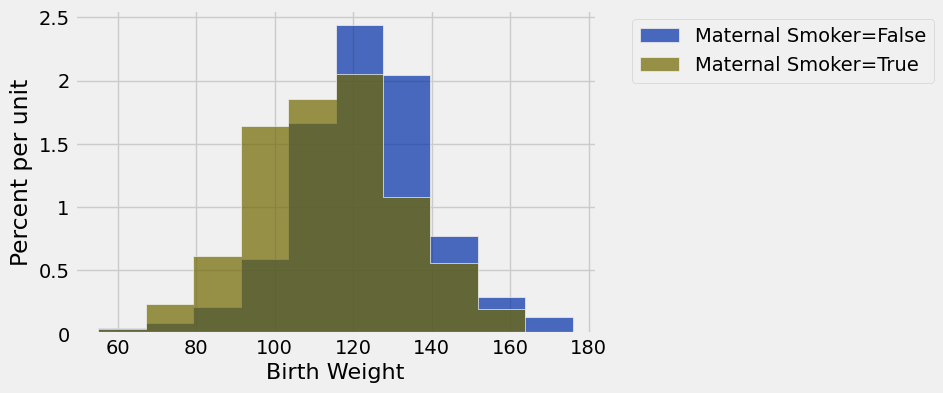

In [32]:
smoking_and_birthweight.hist('Birth Weight', group='Maternal Smoker')

In [31]:
means_table = smoking_and_birthweight.group('Maternal Smoker', np.average)
means_table

Maternal Smoker,Birth Weight average
False,123.085
True,113.819


Null hypothesis: In the population, the distribution of birth weights of babies is the same for mothers who don’t smoke as for mothers who do. The difference in the sample is due to chance.

Alternative hypothesis: In the population, the babies of the mothers who smoke have a lower birth weight, on average, than the babies of the non-smokers.

# Random Permutation (Shuffling)

In [9]:
staff = Table().with_columns(
    'Names', make_array('Jim', 'Pam', 'Dwight', 'Michael'),
    'Ages', make_array(29, 28, 34, 41)
)

In [41]:
# Sampling without replacement means the same row cannot be selected twice.
# Sampling without providing a number of rows will produce a table with the same number of rows as the original.
# This example therefore produces a random permutation (shuffling) of the original table.
shuffled_staff = staff.sample(with_replacement = False)
shuffled_staff

Names,Ages
Michael,41
Jim,29
Pam,28
Dwight,34


In [42]:
staff.with_column('Shuffled', shuffled_staff.column(0))

Names,Ages,Shuffled
Jim,29,Michael
Pam,28,Jim
Dwight,34,Pam
Michael,41,Dwight


In [13]:
def difference_of_means(table, group_label):
    """Takes: name of table,
    column label that indicates the group to which the row belongs
    Returns: Difference of mean birth weights of the two groups"""
    reduced = table.select('Birth Weight', group_label)
    means_table = reduced.group(group_label, np.average)
    means = means_table.column(1)
    return means.item(1) - means.item(0)

In [14]:
difference_of_means(births, 'Maternal Smoker')

-9.266142572024918

# Simulation Under Null Hypothesis

In [15]:
smoking_and_birthweight.show(6)

Maternal Smoker,Birth Weight
False,120
False,113
True,128
True,108
False,136
False,138


In [16]:
shuffled_labels = smoking_and_birthweight.sample(with_replacement=False).column('Maternal Smoker')

In [17]:
original_and_shuffled = smoking_and_birthweight.with_column(
    'Shuffled Label', shuffled_labels
)

In [18]:
original_and_shuffled.show(6)

Maternal Smoker,Birth Weight,Shuffled Label
False,120,True
False,113,False
True,128,True
True,108,False
False,136,True
False,138,True


In [19]:
difference_of_means(original_and_shuffled, 'Shuffled Label')

-1.4534271828389507

# Permutation Test

In [20]:
def one_simulated_difference_of_means():
    """Returns: Difference between mean birthweights
    of babies of smokers and non-smokers after shuffling labels"""
    
    # array of shuffled labels
    shuffled_labels = births.sample(with_replacement=False).column('Maternal Smoker')
    
    # table of birth weights and shuffled labels
    shuffled_table = births.select('Birth Weight').with_column(
        'Shuffled Label', shuffled_labels)
    
    return difference_of_means(shuffled_table, 'Shuffled Label')  

In [21]:
one_simulated_difference_of_means()

0.20641711229947646

In [22]:
differences = make_array()

repetitions = 2500
for i in np.arange(repetitions):
    new_difference = one_simulated_difference_of_means()
    differences = np.append(differences, new_difference) 

Observed Difference: -9.266142572024918


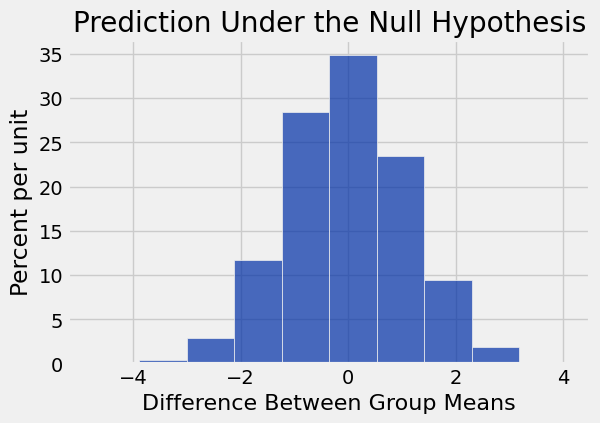

In [23]:
Table().with_column('Difference Between Group Means', differences).hist()
print('Observed Difference:', observed_difference)
plots.title('Prediction Under the Null Hypothesis');